In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 5)


In [3]:
df= pd.read_csv("projectdata.csv")

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df.head(3)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
df.drop('customerID' , axis=1, inplace=True)

In [11]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df = pd.read_csv("projectdata.csv")
df_original = df.copy()


In [13]:
df['TotalCharges'].dtype

dtype('O')

In [14]:
df['TotalCharges'].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df['TotalCharges'].dtype


dtype('float64')

In [17]:
df['TotalCharges'].isnull().sum()


np.int64(11)

In [18]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [19]:
df['TotalCharges'].isnull().sum()
df['TotalCharges'].dtype


dtype('float64')

In [20]:
y= df['Churn']
x= df.drop('Churn',axis=1)

In [21]:
cat_cols = x.select_dtypes(include='object').columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [22]:
for col in cat_cols:
    print(col,":", x[col].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
x=x.drop('customerID',axis=1)

In [24]:
X = x.copy()


In [25]:
yes_no_cols=['Partner','Dependents','PhoneService','PaperlessBilling']
for col in yes_no_cols:
    X[col] = X[col].map({'Yes':1,'No':0})

In [26]:
X['gender'] = X['gender'].map({'Male':1,'Female':0})

In [27]:
X['gender'].head()

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [28]:
X[col].head()

0    1
1    0
2    1
3    0
4    1
Name: PaperlessBilling, dtype: int64

In [29]:
X.select_dtypes(include='object').columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [30]:
X= pd.get_dummies(X,drop_first=True)

In [31]:
X.dtypes.value_counts()

bool       21
int64       7
float64     2
Name: count, dtype: int64

In [32]:
bool_cols=X.select_dtypes(include='bool').columns

In [33]:
X[bool_cols]=X[bool_cols].astype(int)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42,stratify=y
)

In [35]:
X_train.shape,X_test.shape

((5634, 30), (1409, 30))

In [36]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [40]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred=log_reg.predict(X_train_scaled)

In [42]:
y_pred = log_reg.predict(X_test_scaled)


In [43]:
len(y_test), len(y_pred)


(1409, 1409)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[925, 110],
       [162, 212]])

In [45]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [46]:
from sklearn.linear_model import LogisticRegression

log_reg_bal = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_reg_bal.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
y_pred_bal= log_reg_bal.predict(X_test_scaled)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_bal)


array([[749, 286],
       [ 80, 294]])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1035
         Yes       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [50]:
y_prob_bal= log_reg_bal.predict_proba(X_test_scaled)[:,1]

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc= roc_auc_score(y_test, y_prob_bal)
roc_auc

0.8414012245214291

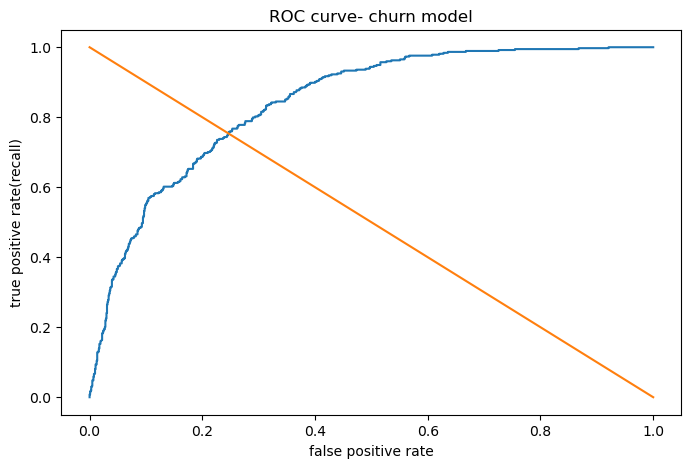

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr,tpr,thresholds = roc_curve(y_test,y_prob_bal,pos_label='Yes')
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[1,0])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate(recall)")
plt.title("ROC curve- churn model")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [54]:
rf= RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train,y_train)
    

,n_estimators,300
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
models={
    "Logistic Regression": log_reg_bal,
    "Random Forest": rf
}

for name, model in models.items():
    if name=="Logistic Regression":
        y_prob = model.predict_proba(X_test_scaled)[:,-1]
    else:
        y_prob= model.predict_proba(X_test)[:,-1]

    print(name,"ROC-AUC:",roc_auc_score(y_test, y_prob))

Logistic Regression ROC-AUC: 0.8414012245214291
Random Forest ROC-AUC: 0.8430184194890077


In [56]:
import pandas as pd

feature_importance= pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)

tenure                                 0.186221
TotalCharges                           0.126950
Contract_Two year                      0.113019
InternetService_Fiber optic            0.081130
MonthlyCharges                         0.076911
PaymentMethod_Electronic check         0.057802
Contract_One year                      0.045227
OnlineSecurity_Yes                     0.034945
TechSupport_Yes                        0.028692
StreamingMovies_No internet service    0.020955
dtype: float64

The most influential factors driving churn are contract type, tenure, and monthly charges. Customers on month-to-month contracts with high monthly charges are significantly more likely to churn.

In [57]:
y_test_binary = y_test.map({'No': 0, 'Yes': 1})


In [58]:
y_test_binary.unique()


array([0, 1])

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix,recall_score
thresholds=[0.3, 0.4, 0.5]

y_prob_rf=rf.predict_proba(X_test)[:,-1]

for t in thresholds:
    y_pred= (y_prob_rf >= t).astype(int)
    recall= recall_score(y_test_binary, y_pred)
    cm=confusion_matrix(y_test_binary, y_pred)

    print(f"\nThreshold: {t}")
    print("Recall:", recall)
    print("Confusion Matrix:\n", cm)


Threshold: 0.3
Recall: 0.8983957219251337
Confusion Matrix:
 [[597 438]
 [ 38 336]]

Threshold: 0.4
Recall: 0.8502673796791443
Confusion Matrix:
 [[698 337]
 [ 56 318]]

Threshold: 0.5
Recall: 0.7727272727272727
Confusion Matrix:
 [[777 258]
 [ 85 289]]


Lowering the threshold from 0.5 to 0.35 significantly increases recall, allowing the business to identify more churn-prone customers at the cost of manageable false positives.

In [60]:
COST_FN=5000
COST_FP=500

In [61]:
def business_cost(y_true,y_pred):
    cm= confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp = cm.ravel()
    return fn*COST_FN + fp*COST_FP

for t in thresholds:
    y_pred=(y_prob_rf>=t).astype(int)
    cost= business_cost(y_test_binary,y_pred)
    print(f"Threshold{t} -> Total Cost: ₹{cost}")

Threshold0.3 -> Total Cost: ₹409000
Threshold0.4 -> Total Cost: ₹448500
Threshold0.5 -> Total Cost: ₹554000


Based on cost-sensitive evaluation, a threshold of ₹409000 results in the lowest total business loss. 
Although this threshold increases false positives, it significantly reduces missed churners, 
which aligns with business priorities in churn management.


In [62]:
!pip install shap 

In [63]:
X_test_sample = X_test.sample(50, random_state=42)

In [64]:
import shap 
shap.initjs()

explainer = shap.Explainer(rf, X_train)

In [65]:
shap_values = explainer(X_test_sample,check_additivity=False)

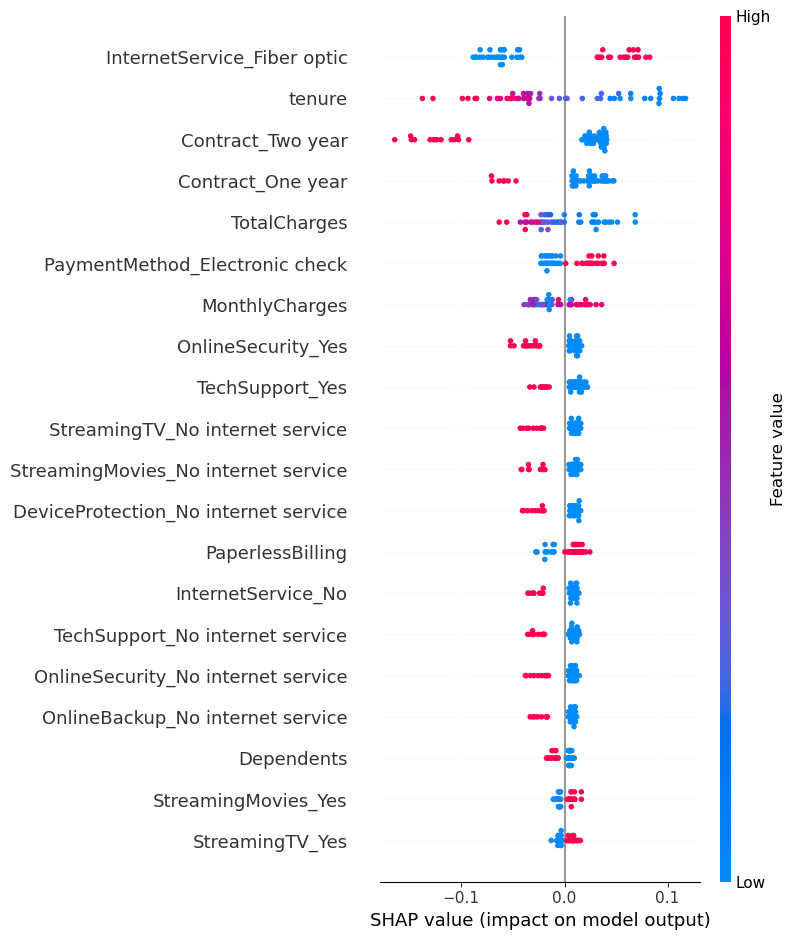

In [66]:
shap.summary_plot(
    shap_values.values[:, :, 1],
    X_test_sample
)

SHAP was used to interpret the Random Forest model at both global and individual levels. 
The SHAP summary plot shows that features such as contract type, monthly charges, and tenure 
have the strongest influence on churn predictions. Higher monthly charges and month-to-month 
contracts push predictions toward churn, while longer customer tenure reduces churn risk. 
This explainability helps translate model outputs into actionable business insights.

In [67]:
final_model = models["Random Forest"]
